### Mount Drive to get Dataset

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import All needed libraries

In [17]:
import os
import cv2
import numpy as np
from skimage.feature import hog 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

### Define functions


In [18]:
def get_train_data(path):
  file = open(path, "r")
  train_list = []
  for line in file:
    train_list.append(line.replace('\n',''))
  return train_list

In [26]:
def get_training_and_testing_data(path, dim):
  labels_list = []
  train_data = [] 
  train_label = [] 
  test_data = []
  test_label = [] 
  for folder in os.listdir(path):
    label_folder = f"{path}{folder}/"
    labels_list.append(int(folder))
    # get train data file names from train text file
    train_list = get_train_data(label_folder+"train.txt") 
    for file in os.listdir(label_folder):
      name = label_folder + file
      if '.txt' not in file:
        train_img = cv2.imread(name)
        if train_img is not None:   
          img = cv2.resize(train_img, dim, interpolation = cv2.INTER_AREA)  
          # apply HOG for feature Extraction
          features, _ = hog(img, orientations=8, pixels_per_cell=(16, 16), 
                            cells_per_block=(4, 4), visualize=True, 
                            multichannel=True)        
          # check if the image is of training data or test data
          if file in train_list:          
            train_data.append(features)
            train_label.append(int(folder)) 
          else:
            test_data.append(features)
            test_label.append(int(folder)) 
  return train_data, train_label, test_data, test_label, sorted(labels_list)

# Implementation

**Get Training and Testing data and labels**

In [27]:
path = "/content/drive/MyDrive/CS893_Sp2022_A1_Dataset/"
dim = (64, 64)

train_data, train_labels, test_data, test_labels, labels = get_training_and_testing_data(path, dim) 
print(labels)       

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


**Apply Classifier (Decision Tree)**

In [28]:
classifier = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None)               
classifier.fit(train_data, train_labels)   

DecisionTreeClassifier()

**Get prediction of test data and make confusion matrix and heat-map**

[[18  0  0  0  0  2  0  0  0  0]
 [ 0 18  0  0  0  0  2  0  0  0]
 [ 0  0 18  0  0  0  1  0  1  0]
 [ 0  0  0 20  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0]
 [ 0  1  0  0  0  0 19  0  0  0]
 [ 0  0  0  0  0  0  1 18  1  0]
 [ 0  4  0  0  0  0  0  3 13  0]
 [ 0  0  0  0  0  0  1  0  0 19]]


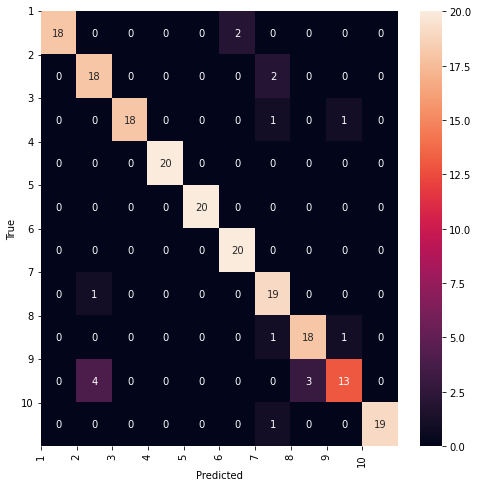

In [29]:
pred = classifier.predict(test_data)   
cnf_matrix = confusion_matrix(test_labels, pred)
print(cnf_matrix)
plt.figure(figsize=(8,8))
sns.heatmap(cnf_matrix, annot=True, fmt='g')
plt.xticks(np.arange(cnf_matrix.shape[0]), labels, rotation=90)
plt.yticks(np.arange(cnf_matrix.shape[0]), labels, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


*   **Calculate Accuracy**

In [30]:
accuracy = accuracy_score(test_labels, pred)
print("Accuracy = ", accuracy)

Accuracy =  0.915


*   Calculating Following Values
  * False Positive Rate
  * False Negative Rate
  * True Positive Rate
  * True Negative Rate
  * False Discovery rate
  * Positive predictive value
  * Negative predicted value
  * Overall Accuracy
  * Precision
  * Recall
  * F1

In [31]:
false_positives = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
false_negatives = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
true_positives = np.diag(cnf_matrix)
true_negatives = cnf_matrix.sum() - (false_positives + false_negatives + true_positives)
  
true_positive_rates = true_positives/(true_positives+false_negatives)
true_negative_rates = true_negatives/(true_negatives+false_positives) 
false_positive_rates = false_positives/(false_positives+true_negatives)
false_negative_rates = false_negatives/(true_positives+false_negatives)
positive_predicted_value = true_positives/(true_positives+false_positives)
negative_predicted_value = true_negatives/(true_negatives+false_negatives)
false_discovery_rate = false_positives/(true_positives+false_positives)

overall_accuracy = (true_positives+true_negatives)/(true_positives+false_positives+false_negatives+true_negatives)

   
precision = float(true_positives[1]) / (true_positives[1] + false_positives[1])
recall = float(true_positives[1]) / (true_positives[1] + false_negatives[1])

f1 = 2*precision*recall / (precision + recall)

print("--------------------------")
print("True positive rate for each class: ", true_positive_rates, "\n")
print("True negative rate for each class: ", true_negative_rates, "\n")
print("False positive rate for each class: ", false_positive_rates, "\n")
print("False negative rate for each class: ", false_negative_rates)
print("---------------------------")
print("False Discovery rate for each class: ",false_discovery_rate, "\n")
print("Positive predictive values: ", positive_predicted_value, "\n")
print("Negative predicted values: ", negative_predicted_value)
print("---------------------------")
print("Overall Accuracy: ", overall_accuracy)
print("Precision: " , precision)
print("Recall: " , recall)
print("F1 Score: " , f1)

--------------------------
True positive rate for each class:  [0.9  0.9  0.9  1.   1.   1.   0.95 0.9  0.65 0.95] 

True negative rate for each class:  [1.         0.97222222 1.         1.         1.         0.98888889
 0.97222222 0.98333333 0.98888889 1.        ] 

False positive rate for each class:  [0.         0.02777778 0.         0.         0.         0.01111111
 0.02777778 0.01666667 0.01111111 0.        ] 

False negative rate for each class:  [0.1  0.1  0.1  0.   0.   0.   0.05 0.1  0.35 0.05]
---------------------------
False Discovery rate for each class:  [0.         0.2173913  0.         0.         0.         0.09090909
 0.20833333 0.14285714 0.13333333 0.        ] 

Positive predictive values:  [1.         0.7826087  1.         1.         1.         0.90909091
 0.79166667 0.85714286 0.86666667 1.        ] 

Negative predicted values:  [0.98901099 0.98870056 0.98901099 1.         1.         1.
 0.99431818 0.98882682 0.96216216 0.99447514]
---------------------------
Overa